In [31]:
import matplotlib.pyplot as plt
import numpy as np
import json
import os
from collections import defaultdict

current_directory = os.getcwd()

quic_tbf = defaultdict(dict)
h1_tbf = defaultdict(dict)
quic_loss = defaultdict(dict)
h1_loss = defaultdict(dict)

for filename in os.listdir(current_directory):
    if filename.endswith('.json'):
        with open(filename, 'r') as file:
            data = json.load(file)
                
            print(f"Processing {filename}...")
            if 'h1_tbf' in filename:
                h1_tbf[filename] = data
            elif 'quic_tbf' or 'inspect_quic_nyu' in filename:
                quic_tbf[filename] = data
            elif 'h1_netem' in filename:
                h1_loss[filename] = data
            elif 'quic_netem' in filename:
                quic_loss[filename] = data
            file.close()
                
        


  


Processing network_inspect_quic_tbf5g32k70ms_nyu.json...
Processing network_inspect_quic_tbf50k32k70ms_nyu.json...
Processing network_inspect_h1_tbf10g32kb70ms_nyu.json...
Processing network_inspect_quic_tbf1g32k70ms_nyu.json...
Processing network_inspect_h1_tbf1m32kb70ms_nyu.json...
Processing network_inspect_quic_netemLoss10_nyu.json...
Processing network_inspect_quic_tbf0.5m32k70ms_nyu.json...
Processing network_inspect_h1_netemLoss50_nyu.json...
Processing network_inspect_h1_tbf5g32kb70ms_nyu.json...
Processing network_inspect_h1_netemLoss20_nyu.json...
Processing network_inspect_quic_netemLoss5_nyu.json...
Processing network_inspect_quic_nyu.json...
Processing network_inspect_h1_tbf1g32kb70ms_nyu.json...
Processing network_inspect_h1_tbf50k32kb70ms_nyu.json...
Processing network_inspect_h1_netemLoss5_nyu.json...
Processing network_inspect_quic_netemLoss50_nyu.json...
Processing network_inspect_h1_netemLoss10_nyu.json...
Processing network_inspect_quic_tbf10g32k70ms_nyu.json...
Pro

In [32]:
#print(quic_tbf.keys())

tc_order = ['50k', '100k','0.5m','1m','1g', '5g','10g']
quic_throughputs = []
h1_throughputs = []
for size in tc_order:
    for key in quic_tbf.keys():
        if size in key:
            print(size, key)
            quic_throughputs.append(quic_tbf[key][-1]['throughput'])
            break
    for key in h1_tbf.keys():
        if size in key:
            print(size, key)
            h1_throughputs.append(h1_tbf[key][-1]['throughput'])
            break
    print('-------')
    

50k network_inspect_quic_tbf50k32k70ms_nyu.json
50k network_inspect_h1_tbf50k32kb70ms_nyu.json
-------
100k network_inspect_quic_tbf100k32k70ms_nyu.json
100k network_inspect_h1_tbf100k32kb70ms_nyu.json
-------
0.5m network_inspect_quic_tbf0.5m32k70ms_nyu.json
0.5m network_inspect_h1_tbf0.5m32kb70ms_nyu.json
-------
1m network_inspect_quic_tbf1m32k70ms_nyu.json
1m network_inspect_h1_tbf1m32kb70ms_nyu.json
-------
1g network_inspect_quic_tbf1g32k70ms_nyu.json
1g network_inspect_h1_tbf1g32kb70ms_nyu.json
-------
5g network_inspect_quic_tbf5g32k70ms_nyu.json
5g network_inspect_h1_tbf5g32kb70ms_nyu.json
-------
10g network_inspect_quic_tbf10g32k70ms_nyu.json
10g network_inspect_h1_tbf10g32kb70ms_nyu.json
-------


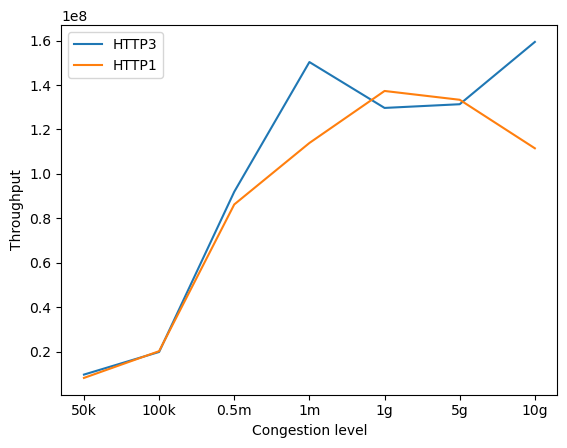

In [33]:
# plot lines
plt.plot(tc_order, quic_throughputs, label = "HTTP3")
plt.plot(tc_order, h1_throughputs, label = "HTTP1")
plt.xlabel("Congestion level")
plt.gca().set_ylabel("Throughput")

plt.legend()
plt.show()

In [34]:
loss_percent = ['Loss5', 'Loss10','Loss20','Loss50']
quic_throughputs = []
h1_throughputs = []
for size in loss_percent:
    for key in quic_loss.keys():
        if size in key:
            print(size, key)
            quic_throughputs.append(quic_loss[key][-1]['throughput'])
            break
    for key in h1_loss.keys():
        if size in key:
            print(size, key)
            h1_throughputs.append(h1_loss[key][-1]['throughput'])
            break
    print('-------')

-------
-------
-------
-------


ValueError: x and y must have same first dimension, but have shapes (4,) and (0,)

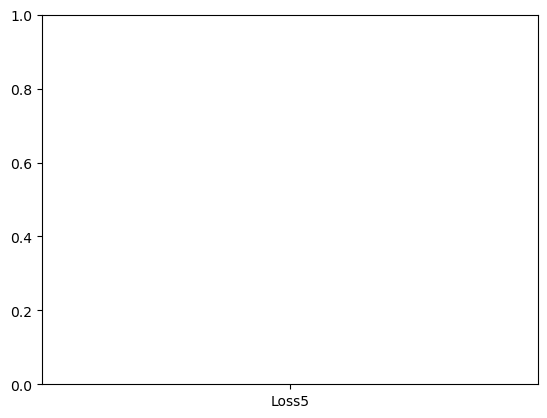

In [35]:
# plot lines
plt.plot(loss_percent, quic_throughputs, label = "HTTP3")
plt.plot(loss_percent, h1_throughputs, label = "HTTP1")
plt.xlabel("Package Loss Percent")
plt.gca().set_ylabel("Throughput")
plt.legend()
plt.show()

In [42]:
congestion = "inspect_quic_nyu"
intervals = []

url_pre = 'https://10'

quic_intervals = {}
for key in quic_tbf.keys():
    if congestion in key:
        datas = quic_tbf[key]
        for data in datas:
            if 'protocol' in data and data['protocol']=="h3":
                abs_time = data["timing"]["requestTime"]
                quic_intervals[data["url"]]= (((abs_time+(data["timing"]["sendStart"])/1000,(abs_time+(data["timing"]["receiveHeadersEnd"])/1000))))

print(len(quic_intervals))
h1_intervals = {}

url_pre = '10.10.1.2'
congestion = "tbf10g32kb70ms"
for key in h1_tbf.keys():
    if congestion in key:
        datas = h1_tbf[key]
        for data in datas:
            if "url" in data and 'timing' in data:
                url = data['url'].replace(':8000',':4433')
                if url in quic_intervals.keys():
                
                    abs_time = data["timing"]["requestTime"]
                    h1_intervals[data["url"]] =(((abs_time+(data["timing"]["sendStart"])/1000,(abs_time+(data["timing"]["receiveHeadersEnd"])/1000))))




print(len(h1_intervals))
                                      
                                      
                                      


45
39


['https://10.10.1.2:8000/', 'https://10.10.1.2:8000/content/dam/nyu/nyuToday/images/homepage/commencement2023/Commencement_Homepage_Image.jpg/jcr:content/renditions/cq5dam.web.1280.1280.jpeg', 'https://10.10.1.2:8000/content/nyu/aggregatedfeed/facebook.html?wcmmode=disabled', 'https://10.10.1.2:8000/content/nyu/aggregatedfeed/instagram.html?wcmmode=disabled', 'https://10.10.1.2:8000/content/nyu/aggregatedfeed/twitter.html?wcmmode=disabled', 'https://10.10.1.2:8000/etc.clientlibs/clientlibs/granite/jquery/granite/csrf.js', 'https://10.10.1.2:8000/etc/designs/nyuseventy/clientlib.css', 'https://10.10.1.2:8000/etc/designs/nyuseventy/clientlib.js', 'https://10.10.1.2:8000/etc/designs/nyuseventy/clientlib/assets/img/social_icons.png', 'https://10.10.1.2:8000/etc/designs/nyuseventy/jqueryclientlib.css', 'https://10.10.1.2:8000/etc/designs/nyuseventy/jqueryclientlib.js', 'https://10.10.1.2:8000/etc/designs/nyuseventy/jquerycustomscrollbarclientlib.css', 'https://10.10.1.2:8000/etc/designs/nyu

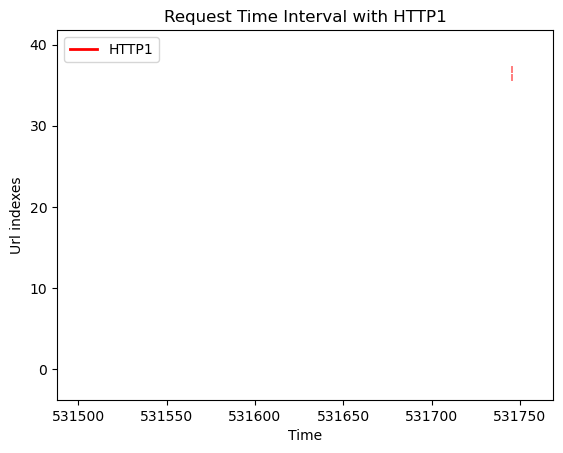

In [43]:
from matplotlib.lines import Line2D # Imported for legends
from matplotlib import collections  as mc
intervals = []

keys = sorted(h1_intervals.keys())
print(keys)
for k in keys:
    intervals.append(h1_intervals[k])
    


num_intervals = len(intervals)
viridis = plt.cm.get_cmap('viridis', 2)


colors = ['r' for i in range(num_intervals)]

# Prepare the input data in correct format for LineCollection 
lines = [[(i[0], j), (i[1], j)] for i, j in zip(intervals, range(len(intervals)))]

lc = mc.LineCollection(lines, colors= colors, linewidths=5)
fig, ax = plt.subplots()

ax.add_collection(lc)
ax.margins(0.1)

ax.set_ylabel('Url indexes')
ax.set_xlabel('Time')
plt.title("Request Time Interval with HTTP1")



# Adding the legends
def make_proxy(col, scalar_mappable, **kwargs):
    color = col 
    return Line2D([0, 1], [0, 1], color=color, **kwargs)
proxies = [make_proxy('r', lc, linewidth=2)]
ax.legend(proxies, ['HTTP1'],loc='upper left')



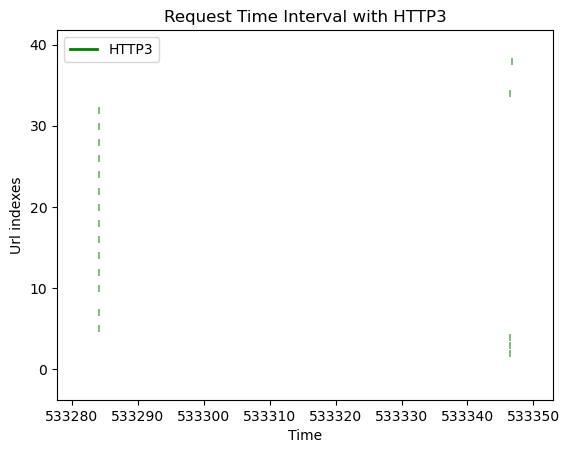

In [44]:
intervals=[]
for k in keys:
    k = k.replace(':8000',':4433')
    intervals.append(quic_intervals[k])



num_intervals = len(intervals)
viridis = plt.cm.get_cmap('viridis', 2)


colors = ['g' for i in range(num_intervals)]

# Prepare the input data in correct format for LineCollection 
lines = [[(i[0], j), (i[1], j)] for i, j in zip(intervals, range(len(intervals)))]

lc = mc.LineCollection(lines, colors= colors, linewidths=5)
fig, ax = plt.subplots()

ax.add_collection(lc)
ax.margins(0.1)

ax.set_ylabel('Url indexes')
ax.set_xlabel('Time')
plt.title("Request Time Interval with HTTP3")

# Adding the legends
def make_proxy(col, scalar_mappable, **kwargs):
    color = col 
    return Line2D([0, 1], [0, 1], color=color, **kwargs)
proxies = [make_proxy('g', lc, linewidth=2)]
ax.legend(proxies, ['HTTP3'],loc='upper left')

